<b> This code is designed to create a precipitation map for seasonally averaged data for a specific year </b> 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# the line above is necessary for getting 
# your plot embedded within the notebook
%matplotlib inline

dset = xr.open_dataset('/chinook/dallmann/MPI/ELI_Bins/fut_pr_nino_strong_MPI_anomDJFmean.nc')
print(dset)

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 384, year: 10)
Coordinates:
  * year      (year) int64 2020 2030 2031 2032 2038 2043 2049 2050 2054 2061
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat       (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (year, lon, bnds) float64 ...
    lat_bnds  (year, lat, bnds) float64 ...
    pr        (year, lat, lon) float32 ...


In [2]:
# Take the average of the time for the respective ENSO Bin. Comment out the code when not using the mean of the file
dset = dset.mean('year')
dset

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 384)
Coordinates:
  * lon       (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat       (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    lat_bnds  (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    pr        (lat, lon) float32 1.533e-07 1.577e-07 ... -7.402e-08 -6.362e-08

In [3]:
print(dset['pr'])

<xarray.DataArray 'pr' (lat: 192, lon: 384)>
array([[ 1.5325857e-07,  1.5767132e-07,  1.5540726e-07, ...,
         1.5065896e-07,  1.5631551e-07,  1.5211404e-07],
       [ 1.5216587e-08,  1.1109887e-07,  1.0007197e-07, ...,
        -1.2456226e-07, -5.6034747e-08, -8.8842512e-08],
       [-1.2197719e-07, -1.1521810e-07, -6.7229358e-08, ...,
        -2.0107184e-07, -1.6105733e-07, -1.8397255e-07],
       ...,
       [-9.4345933e-07, -7.2092496e-07, -6.1307333e-07, ...,
        -9.2071895e-07, -9.6737188e-07, -9.1049424e-07],
       [-9.5172288e-07, -1.1725600e-06, -1.2897341e-06, ...,
        -1.0727739e-06, -1.0695459e-06, -9.5299458e-07],
       [-3.5938353e-08, -2.9619788e-08, -2.9127335e-08, ...,
        -7.9619568e-08, -7.4022424e-08, -6.3622338e-08]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat      (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28


In [4]:
# Convert the units for precipitation into mm/month

precip = dset['pr']*86400*31

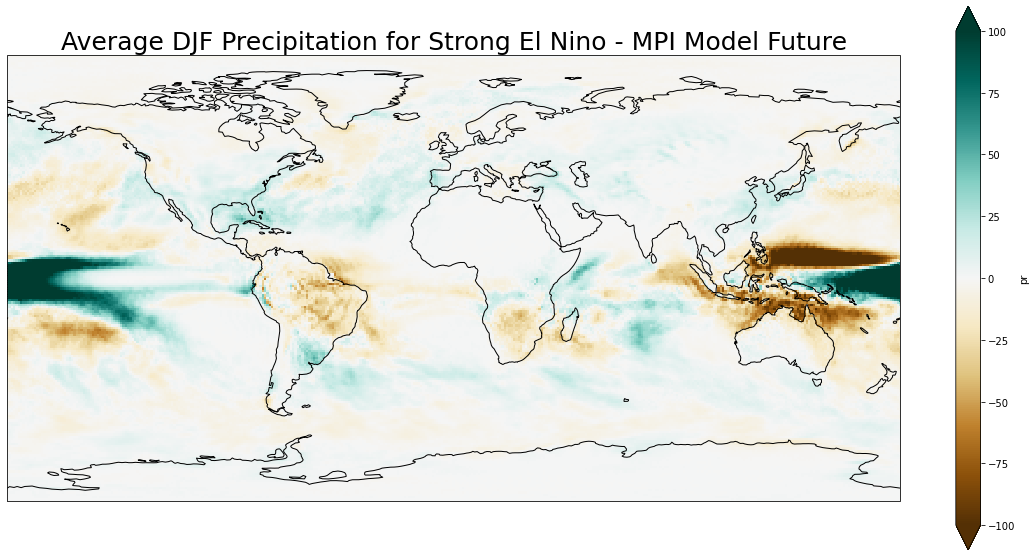

In [5]:
# The projection keyword determines how the plot will look
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# Use when looking at a specfic year
#precip.isel(year=9).plot(cmap='RdBu', vmin=-400, vmax=400)
#plt.title('DJF Precipitation in 2012 for Strong El Nino ', size='25')

# Use when looking at the average of a file
precip.plot(cmap='BrBG', vmin=-100, vmax=100)
plt.title('Average DJF Precipitation for Strong El Nino - MPI Model Future', size='25')

#ax.contourf(lon, lat, precip)  # didn't use transform, but looks ok...
plt.show()